-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.0     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



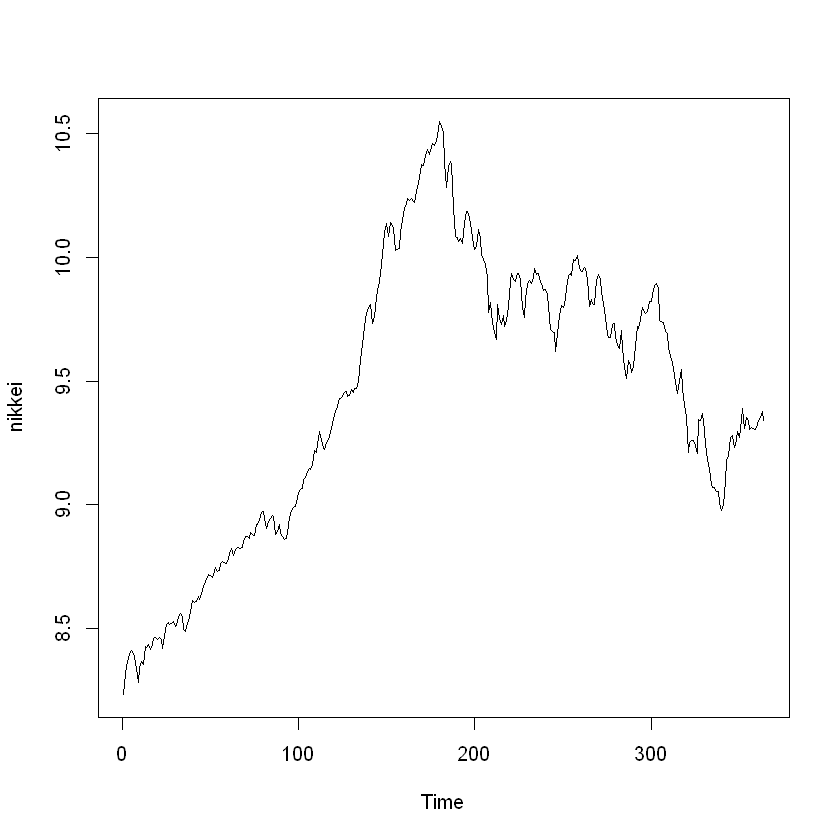

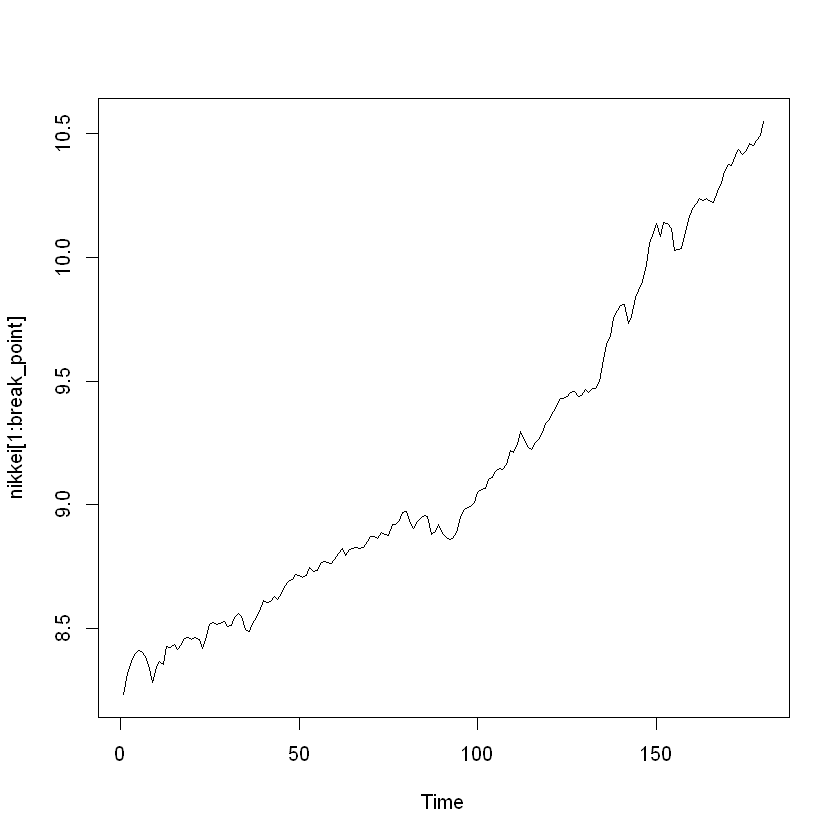

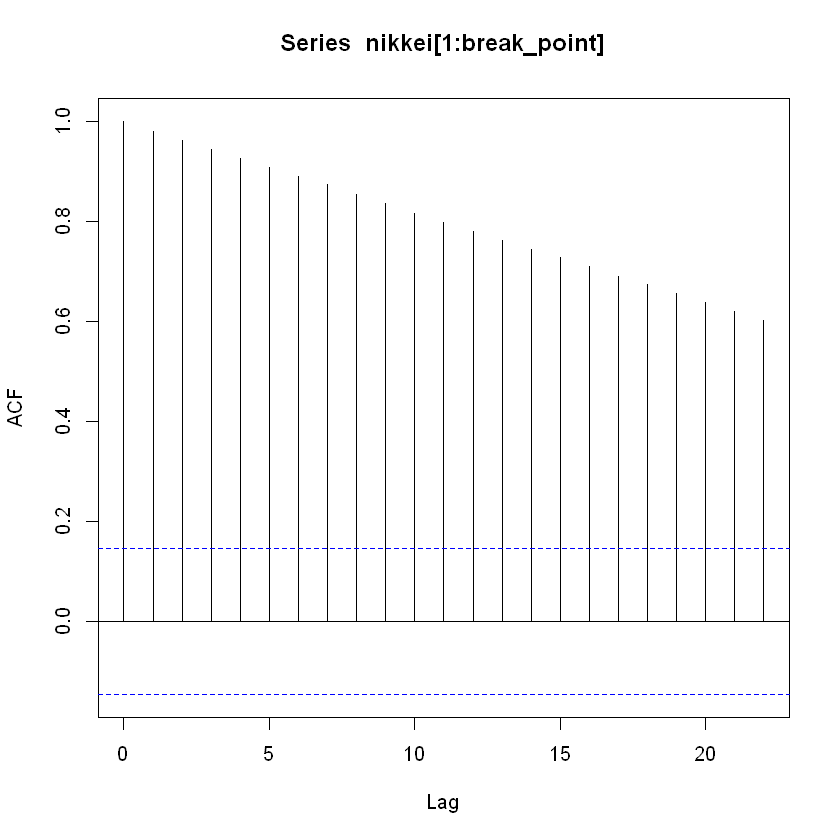

In [19]:
library(urca)
library(broom)
library(tidyverse)
library(purrr)
data_<-read.csv("csvs/economicdata.csv",header=T)
nikkei<-log(data_$nikkei225)
ts.plot(nikkei)
#it seemts obious that nikkei trend had changed at some breaking points
break_point=which(nikkei==max(nikkei))
ts.plot(nikkei[1:break_point])

acf(nikkei[1:break_point])

In [28]:
#TODO:rewroite eficiently with pipe
res_aic<-ur.df(nikkei,"trend",lag=20, "AIC")
summary(res_aic)
#check residual dignosis
resid<-res_aic@res
#res_bic<-ur.df(nikkei,"trend",lag=10, "BIC")
#summary(res_bic)

1             2             3             4             5 
-0.0221538787 -0.0460639424  0.0413408894  0.0236426521 -0.0150069567 
            6             7             8             9            10 
-0.0223231210 -0.0082994318 -0.0073146654 -0.0310378388 -0.0073883309 
           11            12            13            14            15 
 0.0211620724 -0.0074422123 -0.0278537472 -0.0606691689 -0.0064111608 
           16            17            18            19            20 
 0.0193696359  0.0027573616  0.0090364880  0.0235204627 -0.0278406202 
           21            22            23            24            25 
-0.0062790651  0.0063403035 -0.0300841649  0.0166069784  0.0092887027 
           26            27            28            29            30 
 0.0037950029 -0.0065262039  0.0055569392 -0.0189104144 -0.0178983611 
           31            32            33            34            35 
-0.0032015591  0.0189743596 -0.0335748209 -0.0008254007  0.0151972543 
           36            37            38            39            40 
-0.0084843227 -0.0162657095 -0.0155118818  0.0072084178  0.0114303228 
           41            42            43            44            45 
 0.0015060761 -0.0419707460  0.0200079916 -0.0094853641 -0.0085852938 
           46            47            48            49            50 
-0.0123728041 -0.0053967581  0.0108067745  0.0069427317 -0.0133151172 
           51            52            53            54            55 
-0.0191400579  0.0164120840 -0.0227621155 -0.0113290922  0.0370890546 
           56            57            58            59            60 
-0.0205520757  0.0073014551  0.0178340456 -0.0095108735 -0.0603652336 
           61            62            63            64            65 
-0.0156093498  0.0235901977 -0.0024931639 -0.0016787504 -0.0158602600 
           66            67            68            69            70 
-0.0784037589  0.0210794026  0.0165844380 -0.0534743958 -0.0084614878 
           71            72            73            74            75 
-0.0212052359  0.0009588467  0.0111240152  0.0490407714  0.0037776339 
           76            77            78            79            80 
-0.0009448680 -0.0096056278  0.0080737336  0.0308931075 -0.0070035778 
           81            82            83            84            85 
-0.0056506930  0.0272460415 -0.0067839000  0.0164901356 -0.0032396713 
           86            87            88            89            90 
-0.0133665180  0.0160516930  0.0430328924 -0.0275856485  0.0289916018 
           91            92            93            94            95 
 0.0391528321 -0.0577616842 -0.0234112656 -0.0055519261  0.0217518258 
           96            97            98            99           100 
 0.0018694524  0.0189158773  0.0227526287  0.0040023241  0.0208647355 
          101           102           103           104           105 
 0.0097220679  0.0219397776 -0.0156746937  0.0068871322  0.0065805143 
          106           107           108           109           110 
-0.0038086442 -0.0226175990  0.0024428203  0.0185614677 -0.0214313793 
          111           112           113           114           115 
 0.0163450563 -0.0079229910  0.0245596256  0.0752457153  0.0369118299 
          116           117           118           119           120 
 0.0207289354  0.0533675104  0.0137572328  0.0101240565 -0.0023191617 
          121           122           123           124           125 
-0.0771897132  0.0442830910  0.0653687417  0.0096783866  0.0269579121 
          126           127           128           129           130 
 0.0611996151  0.0633197171  0.0253067650  0.0256005303 -0.0616873452 
          131           132           133           134           135 
 0.0698265113 -0.0155276469 -0.0208677579 -0.0841449104  0.0245519088 
          136           137           138           139           140 
 0.0064593382  0.0611207286  0.0397231558  0.0307100509  0.0112444985 
          141           142         